<a href="https://colab.research.google.com/github/kryan126/KNN-MedicationUse/blob/main/AppUserClusteringPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For Data Manipulation:
import pandas as pd 
import numpy as np 

# For Plotting: 
import seaborn as sns 
import matplotlib.pyplot as plt

# For Clustering: 
import sklearn 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Importing the raw Data into a dataframe
fulldata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FullAppData 2.csv')
apply3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apply3.csv')
apply3 = apply3.reset_index(drop=True)
apply3 = apply3.drop("Unnamed: 0", axis=1)

In [ ]:
fulldata.head()

,ptID,type,Avg_WklyScore,A1C,daysUsed,age
0,1,medication,115,High A1C,81,75
1,2,glucose,104,High A1C,85,87
2,2,nutrition,130,High A1C,85,87
3,2,medication,50,High A1C,85,87
4,2,fitness,175,High A1C,85,87


In [ ]:
# Convert from long format to wide format 
data_wide = pd.pivot_table(fulldata, index=['ptID', 'A1C', 'daysUsed', 'age'], columns = ['type'], values = ['Avg_WklyScore']).reset_index()
data_wide = data_wide.fillna(0)

In [ ]:
data_wide.head()

ptID            A1C daysUsed  ... Avg_WklyScore                     
type                               ...       glucose medication nutrition
0       1       High A1C       81  ...           0.0      115.0       0.0
1       2       High A1C       85  ...         104.0       50.0     130.0
2       3  Very High A1C       63  ...          15.0      125.0     115.0
3       5  Very High A1C       12  ...          97.0        0.0       0.0
4       8  Very High A1C       63  ...          29.0       25.0      40.0

[5 rows x 8 columns]

In [ ]:
# Copy dataset for clustering
data_cluster = apply3
data_cluster.head()

,ptID,A1C,daysUsed,age,fitness,glucose,medication,nutrition,mednumber,BMI,gender
0,1,1,81,75,0,0,115,0,4,22.9,M
1,5,0,12,69,0,97,0,0,2,22.1,M
2,8,0,63,72,20,29,25,40,3,22.7,M
3,11,1,25,86,0,17,115,185,4,33.3,M
4,16,1,7,74,0,2,0,10,2,29.5,M


In [ ]:
# Set ptID to index 
data_cluster = data_cluster.set_index('ptID').reset_index(drop = True)

In [ ]:
# Dropping gender column so data is numeric 
data_cluster = data_cluster.drop('gender', axis=1)

In [ ]:
# Scaling the data 
from sklearn.preprocessing import scale
data_cluster = pd.DataFrame(scale(data_cluster), columns=data_cluster.columns)

In [ ]:
# Clustering When k = 2  
seed = 123 
k2_cluster = data_cluster.copy()
k2 = KMeans(n_clusters=2, n_init=25, random_state=seed).fit(k2_cluster)
k2_cluster['Cluster'] = k2.fit_predict(k2_cluster)

# PCA when dim = 2,3,4 
PCA_k2_2 = PCA(n_components=2).fit_transform(k2_cluster.iloc[:,:9])
PCA_k2_3 = PCA(n_components=3).fit_transform(k2_cluster.iloc[:,:9])
PCA_k2_4 = PCA(n_components=4).fit_transform(k2_cluster.iloc[:,:9])
                                          
reduced_k2_2df = pd.DataFrame(PCA_k2_2,columns=['dim1','dim2'])
reduced_k2_3df = pd.DataFrame(PCA_k2_3,columns=['dim1','dim2', 'dim3'])
reduced_k2_4df = pd.DataFrame(PCA_k2_4,columns=['dim1','dim2','dim3', 'dim4'])

# Explained Variance Ratios 
PCA_k2_2_VR = pd.DataFrame(
    {'var' : PCA(n_components=2).fit(k2_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1','PC2']})

PCA_k2_3_VR = pd.DataFrame(
    {'var' : PCA(n_components=3).fit(k2_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1','PC2', 'PC3']})

PCA_k2_4_VR = pd.DataFrame(
    {'var' : PCA(n_components=4).fit(k2_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1','PC2', 'PC3', 'PC4']})

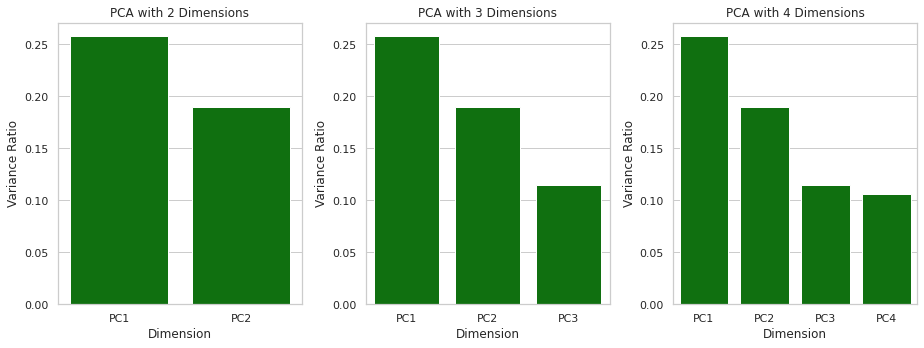

In [ ]:
# Explained Variance Plots for k = 2
sns.set_theme(style='whitegrid')
fig=plt.figure(figsize=(13,5))
columns = 3
rows = 1
ax = plt.subplot2grid((1, 3), (0,0))
ax1 = plt.subplot2grid((1,3), (0, 1))
ax2 = plt.subplot2grid((1, 3), (0, 2))

ax = sns.barplot(x = 'PC', y = 'var', data =PCA_k2_2_VR, color = 'green', ax = ax)
ax.set_xlabel('Dimension')
ax.set_ylabel('Variance Ratio')
_ = ax.set_title('PCA with 2 Dimensions')

ax1 = sns.barplot(x = 'PC', y = 'var', data = PCA_k2_3_VR, color = 'green', ax = ax1)
ax1.set_xlabel('Dimension')
ax1.set_ylabel('Variance Ratio')
_ = ax1.set_title('PCA with 3 Dimensions')

ax2 = sns.barplot(x = 'PC', y = 'var', data = PCA_k2_4_VR, color = 'green', ax = ax2)
ax2.set_xlabel('Dimension')
ax2.set_ylabel('Variance Ratio')
_ = ax2.set_title('PCA with 4 Dimensions')
plt.tight_layout()

In [ ]:
# Clustering When k = 3
seed = 123 
k3_cluster = data_cluster.copy()
k3 = KMeans(n_clusters=3, n_init=25, random_state=seed).fit(k3_cluster)
k3_cluster['Cluster'] = k3.fit_predict(k3_cluster)

# PCA when dim = 2,3,4 
PCA_k3_2 = PCA(n_components=2).fit_transform(k3_cluster.iloc[:,:9])
PCA_k3_3 = PCA(n_components=3).fit_transform(k3_cluster.iloc[:,:9])
PCA_k3_4 = PCA(n_components=4).fit_transform(k3_cluster.iloc[:,:9])
                                          
reduced_k3_2df = pd.DataFrame(PCA_k3_2,columns=['dim1','dim2'])
reduced_k3_3df = pd.DataFrame(PCA_k3_3,columns=['dim1','dim2', 'dim3'])
reduced_k3_4df = pd.DataFrame(PCA_k3_4,columns=['dim1','dim2','dim3', 'dim4'])

# Explained Variance Ratios 
PCA_k3_2_VR = pd.DataFrame(
    {'var' : PCA(n_components=2).fit(k3_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1','PC2']})

PCA_k3_3_VR = pd.DataFrame(
    {'var' : PCA(n_components=3).fit(k3_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1','PC2', 'PC3']})

PCA_k3_4_VR = pd.DataFrame(
    {'var' : PCA(n_components=4).fit(k3_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1','PC2', 'PC3', 'PC4']})

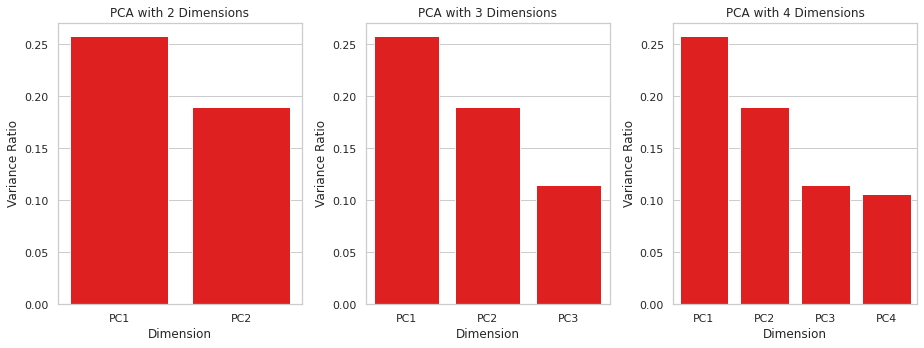

In [ ]:
# Explained Variance Plots for k = 3
sns.set_theme(style='whitegrid')
fig=plt.figure(figsize=(13,5))
columns = 3
rows = 1
ax = plt.subplot2grid((1, 3), (0,0))
ax1 = plt.subplot2grid((1,3), (0, 1))
ax2 = plt.subplot2grid((1, 3), (0, 2))

ax = sns.barplot(x = 'PC', y = 'var', data =PCA_k3_2_VR, color = 'red', ax = ax)
ax.set_xlabel('Dimension')
ax.set_ylabel('Variance Ratio')
_ = ax.set_title('PCA with 2 Dimensions')

ax1 = sns.barplot(x = 'PC', y = 'var', data = PCA_k3_3_VR, color = 'red', ax = ax1)
ax1.set_xlabel('Dimension')
ax1.set_ylabel('Variance Ratio')
_ = ax1.set_title('PCA with 3 Dimensions')

ax2 = sns.barplot(x = 'PC', y = 'var', data = PCA_k3_4_VR, color = 'red', ax = ax2)
ax2.set_xlabel('Dimension')
ax2.set_ylabel('Variance Ratio')
_ = ax2.set_title('PCA with 4 Dimensions')
plt.tight_layout()

In [ ]:
# Clustering when k = 4
seed = 123 
k4_cluster = data_cluster.copy()
k4 = KMeans(n_clusters=4, n_init=25, random_state=seed).fit(k4_cluster)
k4_cluster['Cluster'] = k4.fit_predict(k4_cluster)

# PCA when dim = 2,3,4 
PCA_k4_2 = PCA(n_components=2).fit_transform(k4_cluster.iloc[:,:9])
PCA_k4_3 = PCA(n_components=3).fit_transform(k4_cluster.iloc[:,:9])
PCA_k4_4 = PCA(n_components=4).fit_transform(k4_cluster.iloc[:,:9])
                                          
reduced_k4_2df = pd.DataFrame(PCA_k4_2,columns=['dim1','dim2'])
reduced_k4_3df = pd.DataFrame(PCA_k4_3,columns=['dim1','dim2', 'dim3'])
reduced_k4_4df = pd.DataFrame(PCA_k4_4,columns=['dim1','dim2','dim3', 'dim4'])

# Explained Variance Ratios 
PCA_k4_2_VR = pd.DataFrame(
    {'var' : PCA(n_components=2).fit(k4_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1','PC2']})

PCA_k4_3_VR = pd.DataFrame(
    {'var' : PCA(n_components=3).fit(k4_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1','PC2', 'PC3']})

PCA_k4_4_VR = pd.DataFrame(
    {'var' : PCA(n_components=4).fit(k4_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1','PC2', 'PC3', 'PC4']})


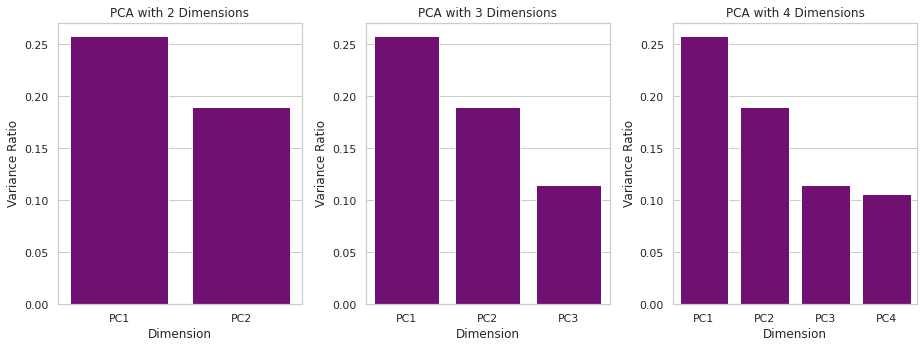

In [ ]:
# Explained Variance Plots for k = 4
sns.set_theme(style='whitegrid')
fig=plt.figure(figsize=(13,5))
columns = 3
rows = 1
ax = plt.subplot2grid((1, 3), (0,0))
ax1 = plt.subplot2grid((1,3), (0, 1))
ax2 = plt.subplot2grid((1, 3), (0, 2))

ax = sns.barplot(x = 'PC', y = 'var', data =PCA_k4_2_VR, color = 'purple', ax = ax)
ax.set_xlabel('Dimension')
ax.set_ylabel('Variance Ratio')
_ = ax.set_title('PCA with 2 Dimensions')

ax1 = sns.barplot(x = 'PC', y = 'var', data = PCA_k4_3_VR, color = 'purple', ax = ax1)
ax1.set_xlabel('Dimension')
ax1.set_ylabel('Variance Ratio')
_ = ax1.set_title('PCA with 3 Dimensions')

ax2 = sns.barplot(x = 'PC', y = 'var', data = PCA_k4_4_VR, color = 'purple', ax = ax2)
ax2.set_xlabel('Dimension')
ax2.set_ylabel('Variance Ratio')
_ = ax2.set_title('PCA with 4 Dimensions')
plt.tight_layout()

In [ ]:
# Clustering when k = 5
seed = 123 
k5_cluster = data_cluster.copy()
k5 = KMeans(n_clusters=5, n_init=25, random_state=seed).fit(k5_cluster)
k5_cluster['Cluster'] = k5.fit_predict(k5_cluster)

# PCA when dim = 2,3,4 
PCA_k5_2 = PCA(n_components=2).fit_transform(k5_cluster.iloc[:,:9])
PCA_k5_3 = PCA(n_components=3).fit_transform(k5_cluster.iloc[:,:9])
PCA_k5_4 = PCA(n_components=4).fit_transform(k5_cluster.iloc[:,:9])
                                          
reduced_k5_2df = pd.DataFrame(PCA_k5_2,columns=['dim1','dim2'])
reduced_k5_3df = pd.DataFrame(PCA_k5_3,columns=['dim1','dim2', 'dim3'])
reduced_k5_4df = pd.DataFrame(PCA_k5_4,columns=['dim1','dim2','dim3', 'dim4'])


# Explained Variance Ratios 
PCA_k5_2_VR = pd.DataFrame(
    {'var' : PCA(n_components=2).fit(k5_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1', 'PC2']})

PCA_k5_3_VR = pd.DataFrame(
    {'var' : PCA(n_components=3).fit(k5_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1', 'PC2', 'PC3']})

PCA_k5_4_VR = pd.DataFrame(
    {'var' : PCA(n_components=4).fit(k5_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1','PC2', 'PC3', 'PC4']})



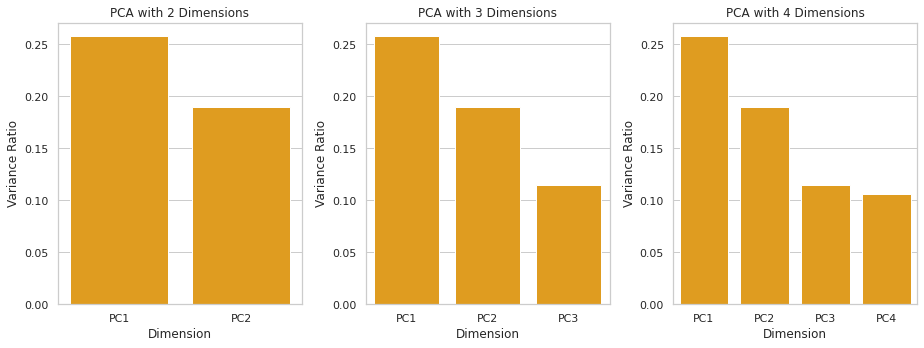

In [ ]:
# Explained Variance Plots for k = 5
sns.set_theme(style='whitegrid')
fig=plt.figure(figsize=(13,5))
columns = 3
rows = 1
ax = plt.subplot2grid((1, 3), (0,0))
ax1 = plt.subplot2grid((1,3), (0, 1))
ax2 = plt.subplot2grid((1, 3), (0, 2))

ax = sns.barplot(x = 'PC', y = 'var', data =PCA_k5_2_VR, color = 'orange', ax = ax)
ax.set_xlabel('Dimension')
ax.set_ylabel('Variance Ratio')
_ = ax.set_title('PCA with 2 Dimensions')

ax1 = sns.barplot(x = 'PC', y = 'var', data = PCA_k5_3_VR, color = 'orange', ax = ax1)
ax1.set_xlabel('Dimension')
ax1.set_ylabel('Variance Ratio')
_ = ax1.set_title('PCA with 3 Dimensions')

ax2 = sns.barplot(x = 'PC', y = 'var', data = PCA_k5_4_VR, color = 'orange', ax = ax2)
ax2.set_xlabel('Dimension')
ax2.set_ylabel('Variance Ratio')
_ = ax2.set_title('PCA with 4 Dimensions')
plt.tight_layout()

In [ ]:
# Clustering when k = 6
seed = 123 
k6_cluster = data_cluster.copy()
k6 = KMeans(n_clusters=6, n_init=25, random_state=seed).fit(k6_cluster)
k6_cluster['Cluster'] = k6.fit_predict(k6_cluster)

# PCA when dim = 2,3,4 
PCA_k6_2 = PCA(n_components=2).fit_transform(k6_cluster.iloc[:,:9])
PCA_k6_3 = PCA(n_components=3).fit_transform(k6_cluster.iloc[:,:9])
PCA_k6_4 = PCA(n_components=4).fit_transform(k6_cluster.iloc[:,:9])
                                          
reduced_k6_2df = pd.DataFrame(PCA_k6_2,columns=['dim1','dim2'])
reduced_k6_3df = pd.DataFrame(PCA_k6_3,columns=['dim1','dim2', 'dim3'])
reduced_k6_4df = pd.DataFrame(PCA_k6_4,columns=['dim1','dim2','dim3', 'dim4'])

# Explained Variance Ratios 
PCA_k6_2_VR = pd.DataFrame(
    {'var' : PCA(n_components=2).fit(k6_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1','PC2']})

PCA_k6_3_VR = pd.DataFrame(
    {'var' : PCA(n_components=3).fit(k6_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1','PC2', 'PC3']})

PCA_k6_4_VR = pd.DataFrame(
    {'var' : PCA(n_components=4).fit(k6_cluster.iloc[:,:9]).explained_variance_ratio_,
    'PC' : ['PC1','PC2', 'PC3', 'PC4']})


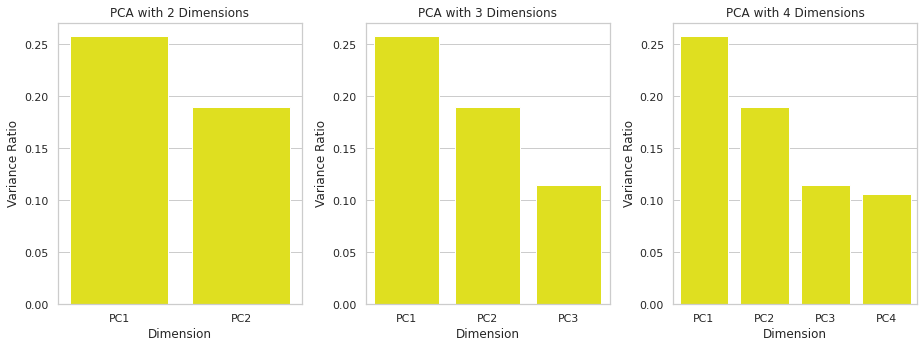

In [ ]:
# Explained Variance Plots for k = 6
sns.set_theme(style='whitegrid')
fig=plt.figure(figsize=(13,5))
columns = 3
rows = 1
ax = plt.subplot2grid((1, 3), (0,0))
ax1 = plt.subplot2grid((1,3), (0, 1))
ax2 = plt.subplot2grid((1, 3), (0, 2))

ax = sns.barplot(x = 'PC', y = 'var', data =PCA_k6_2_VR, color = 'yellow', ax = ax)
ax.set_xlabel('Dimension')
ax.set_ylabel('Variance Ratio')
_ = ax.set_title('PCA with 2 Dimensions')

ax1 = sns.barplot(x = 'PC', y = 'var', data = PCA_k6_3_VR, color = 'yellow', ax = ax1)
ax1.set_xlabel('Dimension')
ax1.set_ylabel('Variance Ratio')
_ = ax1.set_title('PCA with 3 Dimensions')

ax2 = sns.barplot(x = 'PC', y = 'var', data = PCA_k6_4_VR, color = 'yellow', ax = ax2)
ax2.set_xlabel('Dimension')
ax2.set_ylabel('Variance Ratio')
_ = ax2.set_title('PCA with 4 Dimensions')
plt.tight_layout()

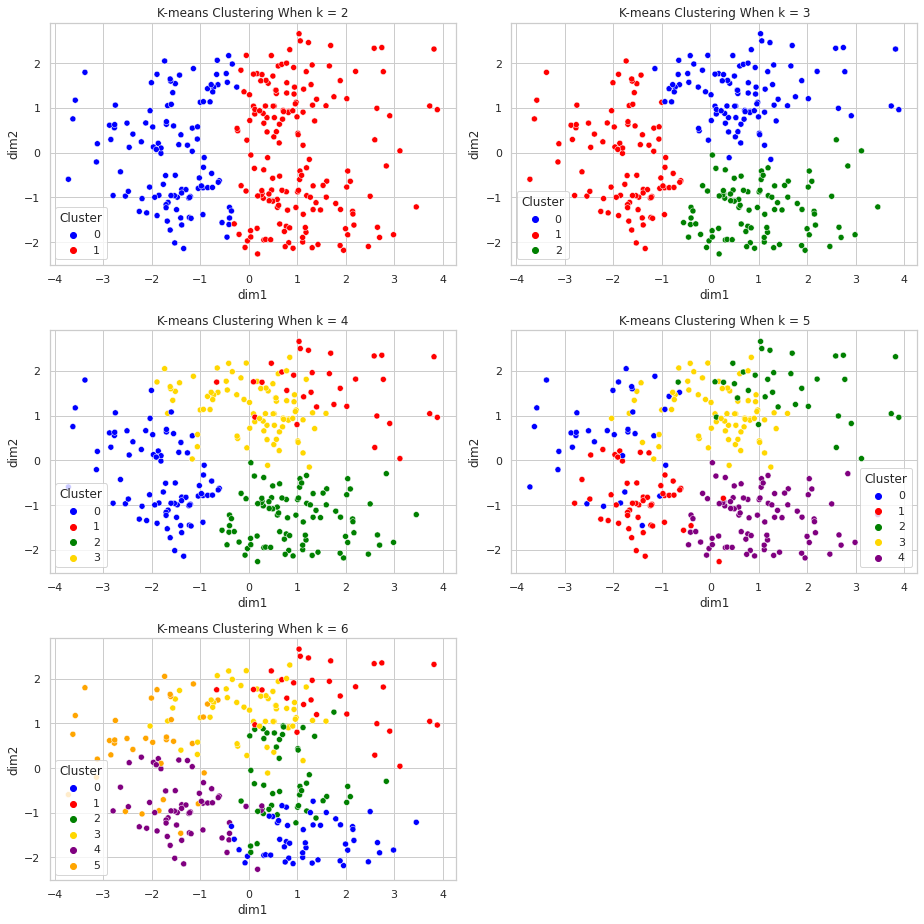

In [ ]:
# Plotting Clusters
sns.set_theme(style='whitegrid')
fig=plt.figure(figsize=(13,13))
columns = 3
rows = 2
palette ={0:'blue', 1:'red', 2:'green', 3:'gold', 4:'purple', 5:'orange'}

ax = plt.subplot2grid((3, 2), (0, 0))
ax1 = plt.subplot2grid((3, 2), (0, 1))
ax2 = plt.subplot2grid((3, 2), (1, 0))
ax3 = plt.subplot2grid((3, 2), (1, 1))
ax4 = plt.subplot2grid((3, 2), (2, 0))


ax = sns.scatterplot(x= 'dim1', y='dim2', hue=k2_cluster['Cluster'],  data= reduced_k2_2df, palette=palette, ax=ax) 
_ = ax.set_title('K-means Clustering When k = 2')
ax1 = sns.scatterplot(x= 'dim1', y='dim2', hue=k3_cluster['Cluster'], data=reduced_k3_2df, palette=palette, ax = ax1)
_ = ax1.set_title('K-means Clustering When k = 3')

ax2 = sns.scatterplot(x= 'dim1', y='dim2', hue=k4_cluster['Cluster'], data=reduced_k4_2df, palette=palette, ax = ax2)
_ = ax2.set_title('K-means Clustering When k = 4')
ax3 = sns.scatterplot(x= 'dim1', y='dim2', hue=k5_cluster['Cluster'], data=reduced_k5_2df, palette=palette, ax = ax3)
_ = ax3.set_title('K-means Clustering When k = 5')
ax4 = sns.scatterplot(x= 'dim1', y= 'dim2', hue=k6_cluster['Cluster'], data=reduced_k6_2df, palette=palette, ax = ax4)
_ = ax4.set_title('K-means Clustering When k = 6')

plt.tight_layout()

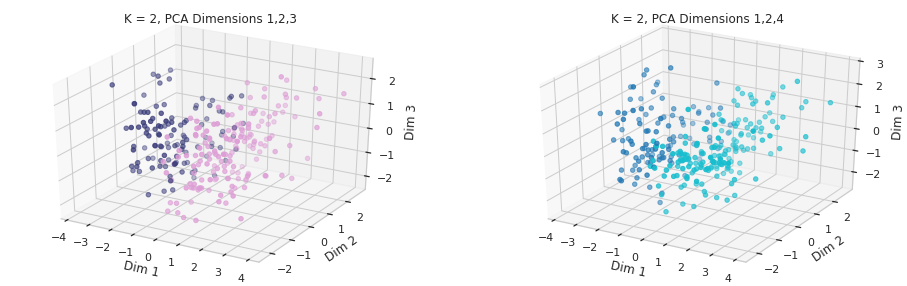

In [ ]:
# 3D plots for k = 2 
sns.set_theme(style='whitegrid')
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(121, projection = '3d')
ax1 = fig.add_subplot(122, projection = '3d')

x = reduced_k2_3df['dim1']
y = reduced_k2_3df['dim2']
z = reduced_k2_3df['dim3']

ax.scatter(x,y,z, c = k2_cluster['Cluster'],cmap='tab20b')
_ = ax.set_xlabel('Dim 1')
_ = ax.set_ylabel('Dim 2')
_ = ax.set_zlabel('Dim 3')
_ = ax.set_title('K = 2, PCA Dimensions 1,2,3')

x1 = reduced_k2_4df['dim1']
y1 = reduced_k2_4df['dim2']
z1 = reduced_k2_4df['dim4']

ax1.scatter(x1,y1,z1, c= k2_cluster['Cluster'], cmap = 'tab10')
_ = ax1.set_xlabel('Dim 1')
_ = ax1.set_ylabel('Dim 2')
_ = ax1.set_zlabel('Dim 3')
_ = ax1.set_title('K = 2, PCA Dimensions 1,2,4')


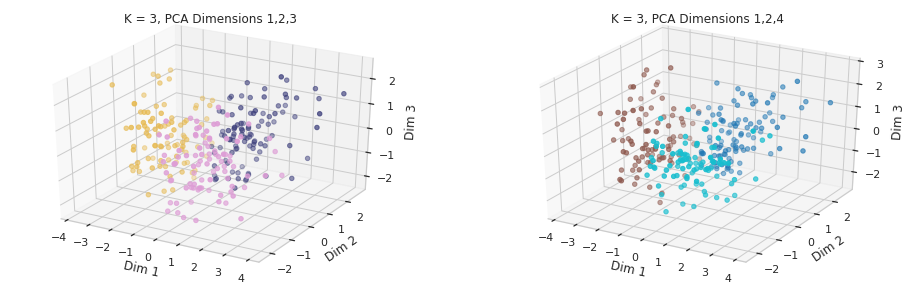

In [ ]:
# 3D Plots for k = 3
# 3D plots for k = 2 
sns.set_theme(style='whitegrid')
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(121, projection = '3d')
ax1 = fig.add_subplot(122, projection = '3d')

x = reduced_k3_3df['dim1']
y = reduced_k3_3df['dim2']
z = reduced_k3_3df['dim3']

ax.scatter(x,y,z, c = k3_cluster['Cluster'],cmap='tab20b')
_ = ax.set_xlabel('Dim 1')
_ = ax.set_ylabel('Dim 2')
_ = ax.set_zlabel('Dim 3')
_ = ax.set_title('K = 3, PCA Dimensions 1,2,3')

x1 = reduced_k3_4df['dim1']
y1 = reduced_k3_4df['dim2']
z1 = reduced_k3_4df['dim4']

ax1.scatter(x1,y1,z1, c= k3_cluster['Cluster'], cmap = 'tab10')
_ = ax1.set_xlabel('Dim 1')
_ = ax1.set_ylabel('Dim 2')
_ = ax1.set_zlabel('Dim 3')
_ = ax1.set_title('K = 3, PCA Dimensions 1,2,4')

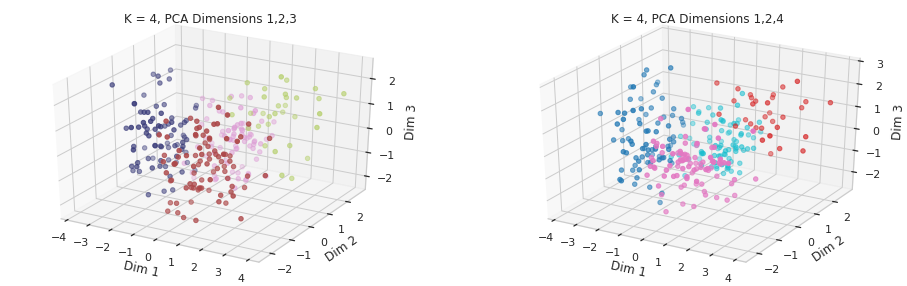

In [ ]:
# 3D plots for k = 4 
sns.set_theme(style='whitegrid')
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(121, projection = '3d')
ax1 = fig.add_subplot(122, projection = '3d')

x = reduced_k4_3df['dim1']
y = reduced_k4_3df['dim2']
z = reduced_k4_3df['dim3']

ax.scatter(x,y,z, c = k4_cluster['Cluster'],cmap='tab20b')
_ = ax.set_xlabel('Dim 1')
_ = ax.set_ylabel('Dim 2')
_ = ax.set_zlabel('Dim 3')
_ = ax.set_title('K = 4, PCA Dimensions 1,2,3')

x1 = reduced_k4_4df['dim1']
y1 = reduced_k4_4df['dim2']
z1 = reduced_k4_4df['dim4']

ax1.scatter(x1,y1,z1, c= k4_cluster['Cluster'], cmap = 'tab10')
_ = ax1.set_xlabel('Dim 1')
_ = ax1.set_ylabel('Dim 2')
_ = ax1.set_zlabel('Dim 3')
_ = ax1.set_title('K = 4, PCA Dimensions 1,2,4')

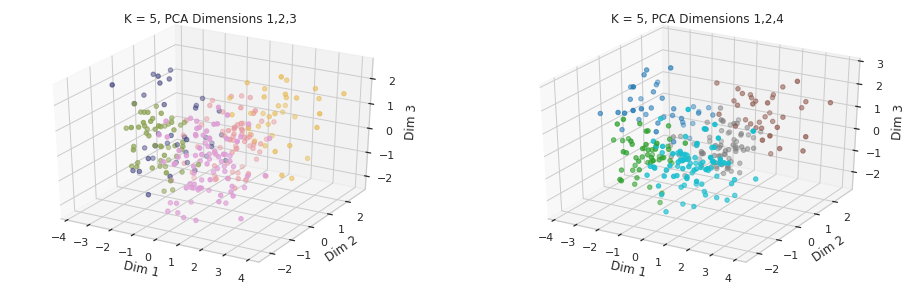

In [ ]:
# 3D Plots for k = 5 
sns.set_theme(style='whitegrid')
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(121, projection = '3d')
ax1 = fig.add_subplot(122, projection = '3d')

x = reduced_k5_3df['dim1']
y = reduced_k5_3df['dim2']
z = reduced_k5_3df['dim3']

ax.scatter(x,y,z, c = k5_cluster['Cluster'],cmap='tab20b')
_ = ax.set_xlabel('Dim 1')
_ = ax.set_ylabel('Dim 2')
_ = ax.set_zlabel('Dim 3')
_ = ax.set_title('K = 5, PCA Dimensions 1,2,3')

x1 = reduced_k5_4df['dim1']
y1 = reduced_k5_4df['dim2']
z1 = reduced_k5_4df['dim4']

ax1.scatter(x1,y1,z1, c= k5_cluster['Cluster'], cmap = 'tab10')
_ = ax1.set_xlabel('Dim 1')
_ = ax1.set_ylabel('Dim 2')
_ = ax1.set_zlabel('Dim 3')
_ = ax1.set_title('K = 5, PCA Dimensions 1,2,4')

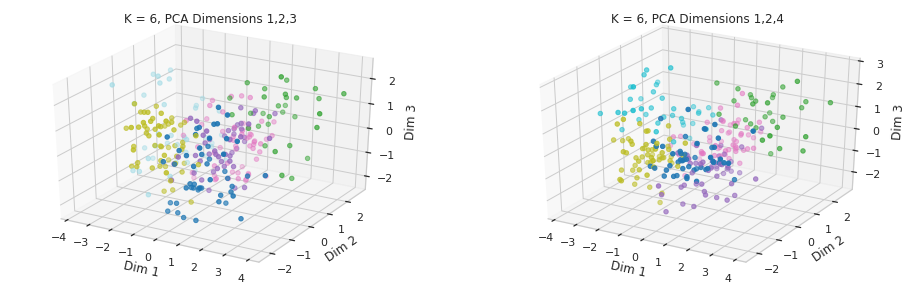

In [ ]:
# 3D Plots for k = 6 
sns.set_theme(style='whitegrid')
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(121, projection = '3d')
ax1 = fig.add_subplot(122, projection = '3d')

x = reduced_k6_3df['dim1']
y = reduced_k6_3df['dim2']
z = reduced_k6_3df['dim3']

ax.scatter(x,y,z, c = k6_cluster['Cluster'],cmap='tab20')
_ = ax.set_xlabel('Dim 1')
_ = ax.set_ylabel('Dim 2')
_ = ax.set_zlabel('Dim 3')
_ = ax.set_title('K = 6, PCA Dimensions 1,2,3')

x1 = reduced_k6_4df['dim1']
y1 = reduced_k6_4df['dim2']
z1 = reduced_k6_4df['dim4']

ax1.scatter(x1,y1,z1, c= k6_cluster['Cluster'], cmap = 'tab10')
_ = ax1.set_xlabel('Dim 1')
_ = ax1.set_ylabel('Dim 2')
_ = ax1.set_zlabel('Dim 3')
_ = ax1.set_title('K = 6, PCA Dimensions 1,2,4')

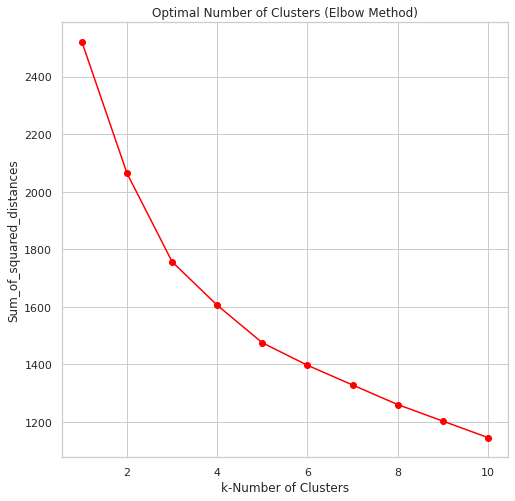

In [ ]:
# Elbow Method
Sum_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, n_init=25, random_state=seed)
    km = km.fit(data_cluster)
    Sum_squared_distances.append(km.inertia_)

fig=plt.figure(figsize=(8,8))
plt.plot(K, Sum_squared_distances, 'bx-', marker = 'o', color = 'red')
plt.xlabel('k-Number of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal Number of Clusters (Elbow Method)')
plt.show()

# k = 5

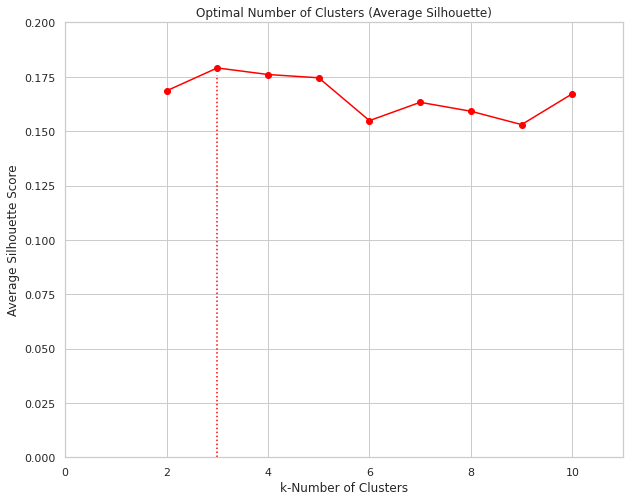

In [ ]:
# Average Silhouette Method
from sklearn.metrics import silhouette_samples, silhouette_score

avg_score_list = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k, n_init=25, random_state=seed)
    km_labels = km.fit_predict(data_cluster)
    silhouette_avg = silhouette_score(data_cluster, km_labels)
    avg_score_list.append(silhouette_avg)

fig=plt.figure(figsize=(10,8))
plt.plot(K, avg_score_list, 'bx-', marker = 'o', color = 'red')
plt.xlabel('k-Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Optimal Number of Clusters (Average Silhouette)')
plt.axis([0, 11, 0, .20])
plt.vlines(3, ymin=0, ymax=0.17604384718231156, linestyles='dotted', color = 'red')
plt.show()
# k = 3

In [ ]:
# Facotorize A1C in data_wide
data_wide['A1C'] = data_wide['A1C'].replace({'High A1C':0,'Very High A1C':1})

In [ ]:
data_wide.head()

ptID A1C daysUsed age Avg_WklyScore                             
type                             fitness glucose medication nutrition
0       1   0       81  75           0.0     0.0      115.0       0.0
1       2   0       85  87         175.0   104.0       50.0     130.0
2       3   1       63  69         190.0    15.0      125.0     115.0
3       5   1       12  69           0.0    97.0        0.0       0.0
4       8   1       63  72          20.0    29.0       25.0      40.0

In [ ]:
# Compute k means clustering with k = 2
final_k2 = KMeans(n_clusters=2, n_init=25, random_state=seed).fit(data_cluster)
k2_centroids = final_k2.cluster_centers_
k2_labels = final_k2.labels_

In [ ]:
# Centroids when k = 2
print('Cluster Means:\n', k2_centroids)

Cluster Means:
 [[-0.10741723 -0.47610675 -0.07409645 -0.71251836 -0.55109894 -0.64293535
  -0.86115739  0.41227621  0.25435608]
 [ 0.07161149  0.3174045   0.04939763  0.47501224  0.36739929  0.42862356
   0.57410493 -0.27485081 -0.16957072]]


In [ ]:
# Clustering labels when k = 2 
print('Clustering Vector:\n', k2_labels)

Clustering Vector:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1]


In [ ]:
df_k2_wide = data_wide.copy()
df_k2_wide = df_k2_wide.assign(
    Cluster = k2_labels).assign(
        n = lambda df: df['Cluster'].apply(lambda x:(k2_labels == 0).sum() if x == 0 else (k2_labels == 1).sum()))

In [ ]:
df_k2_wide = df_k2_wide.drop('ptID', axis=1) 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
df_k2_wide = df_k2_wide.groupby(by = 'Cluster')

In [ ]:
df_k2_wide.mean()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


A1C   daysUsed        age  ... Avg_WklyScore                  n
type                                     ...    medication   nutrition       
Cluster                                  ...                                 
0        0.553571  71.151786  78.169643  ...    106.473214  123.133929  112.0
1        0.523810  72.541667  77.208333  ...    130.148810  134.601190  168.0

[2 rows x 8 columns]

In [ ]:
# Compute k means clustering with k = 5
final_k5 = KMeans(n_clusters=5, n_init=25, random_state=seed).fit(data_cluster)
k5_centroids = final_k5.cluster_centers_
k5_labels = final_k5.labels_

(280,)

In [ ]:
# Centroids when k = 5
print('Cluster Means:\n', k5_centroids)

Cluster Means:
 [[ 3.69670111e-01 -1.61123607e+00  2.63630610e-01 -5.48039098e-01
  -7.18611710e-01 -1.53096605e+00 -5.42063519e-01  2.69279505e-01
   2.85942820e-01]
 [-8.92389305e-01  1.96826077e-02 -2.80509635e-01 -9.93149168e-01
  -3.85013484e-01 -1.58070943e-01 -1.15317249e+00  2.88945718e-01
   4.93809501e-01]
 [ 9.59593931e-01 -3.63415105e-01  1.19994250e-03  6.76770974e-01
   1.69591261e+00  6.16167821e-01  9.52434401e-01  8.01648182e-01
  -5.99082581e-01]
 [ 1.07417231e+00  5.11175530e-01  8.23960517e-02  1.35534153e-01
  -2.82760840e-01 -5.28201042e-02 -5.81462282e-02  2.43039369e-01
  -6.76187813e-01]
 [-9.30949336e-01  4.10799161e-01 -1.35993483e-02  4.58044765e-01
   9.06092106e-02  5.60745319e-01  6.05626712e-01 -8.39821904e-01
   3.97564696e-01]]


In [ ]:
# Clustering labels when k = 5 
print('Clustering Vector:\n', k5_labels)

Clustering Vector:
 [3 0 1 0 0 1 0 0 1 3 3 3 3 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 3 1 1 3 3 3 3
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 3 3 2 3 2 3 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 4 4 4
 4 4 1 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 1]


In [ ]:
df_k5_wide = data_wide.copy()
df_k5_wide = df_k5_wide.assign(
    Cluster = k5_labels).assign(
        n = lambda df: df['Cluster'].apply(lambda x:(k5_labels == 0).sum() if x == 0 
                                           else ((k5_labels == 1).sum() if  x == 1 
                                                  else ((k5_labels == 2).sum() if  x == 2
                                                        else (k5_labels == 3).sum() if  x == 3
                                                            else (k5_labels == 4).sum()))))

In [ ]:
df_k5_wide.head()

ptID A1C daysUsed age  ... Avg_WklyScore           Cluster   n
type                        ...    medication nutrition            
0       1   0       81  75  ...         115.0       0.0       3  72
1       2   0       85  87  ...          50.0     130.0       0  37
2       3   1       63  69  ...         125.0     115.0       1  52
3       5   1       12  69  ...           0.0       0.0       0  37
4       8   1       63  72  ...          25.0      40.0       0  37

[5 rows x 10 columns]

In [ ]:
df_k5_wide = df_k5_wide.drop('ptID', axis=1) 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
df_k5_wide = df_k5_wide.groupby(by = 'Cluster')

In [ ]:
df_k5_wide.mean()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


A1C   daysUsed        age  ... Avg_WklyScore                 n
type                                     ...    medication   nutrition      
Cluster                                  ...                                
0        0.594595  66.729730  78.000000  ...     92.972973  107.432432  37.0
1        0.557692  74.653846  78.057692  ...    122.692308  132.288462  52.0
2        0.428571  73.828571  77.085714  ...    140.857143  153.514286  35.0
3        0.652778  75.694444  77.166667  ...    140.625000  142.069444  72.0
4        0.440476  68.702381  77.702381  ...    106.130952  118.428571  84.0

[5 rows x 8 columns]

In [ ]:
# Compute k means clustering with k = 6
final_k6 = KMeans(n_clusters=6, n_init=25, random_state=seed).fit(data_cluster)
k6_centroids = final_k6.cluster_centers_
k6_labels = final_k6.labels_

In [ ]:
# Centroids when k = 6
print('Cluster Means:\n', k6_centroids)

Cluster Means:
 [[-0.93094934  0.4658353   0.21924664  0.63234703  0.32136176  0.56675085
   0.7719987  -0.87363292  1.0726096 ]
 [ 0.94480962 -0.29504383 -0.04540428  0.59323725  1.92613563  0.6225442
   0.93514607  0.78982664 -0.62565637]
 [-0.17902872  0.22795851 -0.45657812  0.39962266 -0.22082906  0.54122733
   0.3758513  -0.83027847 -0.77212157]
 [ 1.07417231  0.58070949  0.31891103  0.1361498  -0.2710701  -0.17540676
  -0.07882273  0.63448746 -0.62037726]
 [-0.86180721  0.03265024 -0.26469076 -0.96621274 -0.39340529 -0.11042491
  -1.03981174  0.20771771  0.49449883]
 [ 0.36967011 -1.61123607  0.26363061 -0.5480391  -0.71861171 -1.53096605
  -0.54206352  0.2692795   0.28594282]]


In [ ]:
# Clustering labels when k = 6 
print('Clustering Vector:\n', k6_labels)

Clustering Vector:
 [3 5 4 5 5 4 5 5 4 3 3 3 3 5 4 4 4 4 5 5 5 4 4 5 4 5 5 5 5 5 3 4 4 3 4 3 3
 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 4 4 4 4
 4 4 4 4 5 5 5 5 4 4 4 4 4 4 5 4 5 4 4 4 4 4 3 3 1 3 1 3 1 3 3 2 3 3 3 2 3
 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 2 2 1 1 1 1 1 1 1 1 1 1 1 1 3 2 2
 2 1 1 1 1 1 1 1 1 1 1 2 1 3 2 1 2 3 3 2 3 3 3 3 2 2 3 3 3 3 3 3 2 3 3 3 2
 2 3 3 1 1 2 0 2 0 0 0 2 2 2 2 0 2 0 2 0 4 4 4 4 2 2 0 0 0 2 0 2 0 2 0 2 2
 0 0 0 0 0 0 2 2 0 0 2 4 0 0 2 2 2 0 0 2 2 0 0 0 0 2 0 0 0 1 0 0 1 0 0 2 4
 2 2 4 0 0 0 0 4 2 2 2 0 0 0 0 0 0 0 0 0 4]


In [ ]:
df_k6_wide = data_wide.copy()
df_k6_wide = df_k6_wide.assign(
    Cluster = k6_labels).assign(
        n = lambda df: df['Cluster'].apply(lambda x:(k6_labels == 0).sum() if x == 0 
                                           else ((k6_labels == 1).sum() if  x == 1 
                                                  else ((k6_labels == 2).sum() if  x == 2
                                                        else (k6_labels == 3).sum() if  x == 3
                                                            else (k6_labels == 4).sum() if x == 4
                                                              else (k6_labels).sum()))))

In [ ]:
df_k6_wide = df_k6_wide.drop('ptID', axis=1) 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
df_k6_wide = df_k6_wide.groupby(by = 'Cluster')

In [ ]:
df_k6_wide.mean()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


A1C   daysUsed        age  ... Avg_WklyScore                  n
type                                     ...    medication   nutrition       
Cluster                                  ...                                 
0        0.510204  69.142857  78.448980  ...    116.224490  119.020408   49.0
1        0.419355  73.032258  76.741935  ...    137.903226  167.935484   31.0
2        0.500000  71.083333  76.145833  ...    123.645833  139.125000   48.0
3        0.631579  76.070175  77.789474  ...    135.614035  132.070175   57.0
4        0.517241  73.913793  78.068966  ...    115.775862  123.879310   58.0
5        0.594595  66.729730  78.000000  ...     92.972973  107.432432  715.0

[6 rows x 8 columns]